In [1]:
#%% Basic imports
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import scipy as sp
import os

# look into this: https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo

In [2]:
%matplotlib inline

# Guide to figure and axes manipulation - LABELING

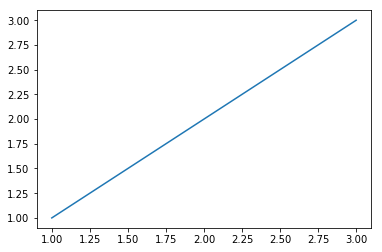

In [3]:
# make a figure and axes using an object oriented method
figsize=(4,4)
fig, ax = plt.subplots(1,1)

# or 
# gridding = (1,1)
# gs = gridspec.GridSpec(*gridding)
# fig = plt.figure(figsize=figsize)
# ax = fig.add_subplot(gs[:,:])

# or 
# fig = plt.figure(figsize=figsize)
# ax = fig.add_axes([0,0,1,1])

dummyX = [1,2,3]
dummyY = [1,2,3]
ax.plot(dummyX, dummyY)

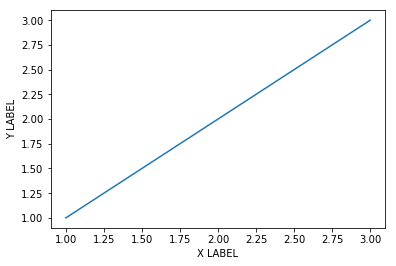

In [4]:
# adding axes labels
ax.set_xlabel("X LABEL")
ax.set_ylabel("Y LABEL")
fig

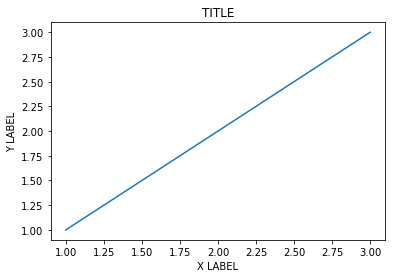

In [5]:
# adding a title
ax.set_title('TITLE')
fig

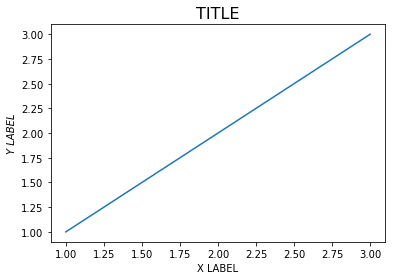

In [6]:
# I would like to have different font sizes and fontweights for the title, so let's do that again
ax.set_title('TITLE', fontsize=16, fontweight='bold')

# I want the yaxis to be italized
ax.set_ylabel('Y LABEL', fontstyle='italic')
fig

# this is to show that you can futher customize axis labeling with additional arguments

# Guide to figure and axes manipulation - LEGEND

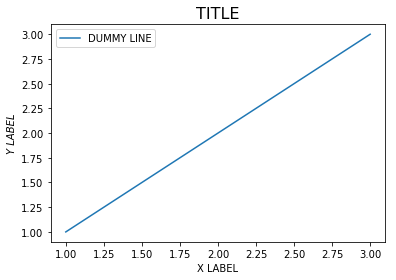

In [7]:
# each axes contains a list of objects that were plotted on it, whether those are lines or patches (bars), etc.
lines = ax.lines
print(lines)

# I would like to make a legend for this
line_legend = ['DUMMY LINE'] # note that this has to be in a list-like object
ax.legend(lines, line_legend) 
fig

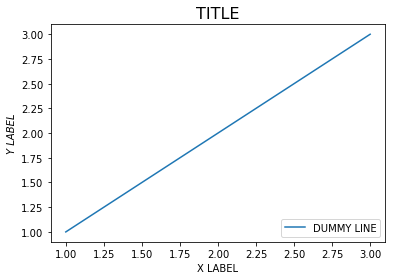

In [8]:
# let's change the location of the legend
ax.legend(lines, line_legend, loc='lower right')
fig

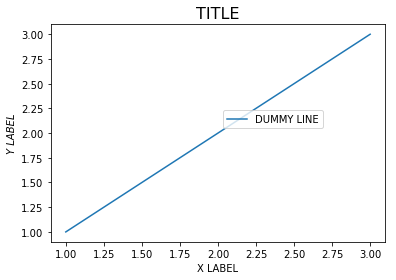

In [9]:
# you can also use coordinates
ax.legend(lines, line_legend, loc='lower left', bbox_to_anchor=(0.5, 0.5))
fig

# this needs some explaining, the loc argument tells where the legend box should go based on the edge 
# of the legend. So 'lower right' means the lower right corner of the legend box should go to the 
# lower right corner of the axis (as the example above)
# However, when using bbox_to_anchor, we are establishing a coordinate at which the legend will lie
# So bbox_to_anchor=(0.5,0.5) tells us that the legend will be placed right in the middle (relative coordinates)
# However, adding loc='lower left' further tells the plot to place the lower left corner of the legend
# at coordinate 0.5,0.5

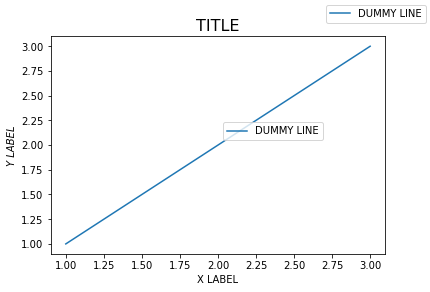

In [10]:
# you can do the same for a figure legend
fig.legend(lines, line_legend)
fig

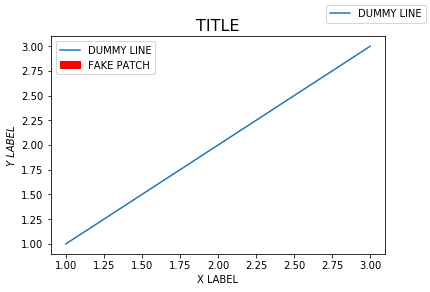

In [11]:
# you can actually "trick" the plot into thinking it has more than 1 line. 
# This may be useful if you are making annotations that are not specifically plots
# Let's create a red patch, 'patches' are a class that typically represent bar charts, so we'll fake a bar chart legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red')

# so we made a red_patch, representing a red bar in a bar chart. Let's combine the previous line object with this patch object
new_legend_items = [lines[0], red_patch] # note that lines is in a list-like object
new_legend_labels = ['DUMMY LINE', 'FAKE PATCH']

# we use the same exact command to establish a legend
ax.legend(new_legend_items, new_legend_labels, loc='upper left')
fig

# Guide to figure and axes manipulation - TICKS

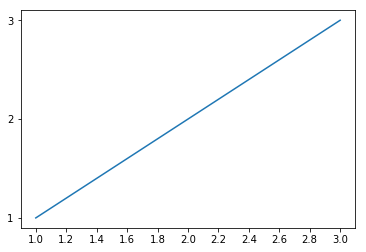

In [12]:
# let's refresh the plot
fig, ax = plt.subplots(1,1)
ax.plot(dummyX, dummyY)

# changing the number of ticks
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=2)

# note that using nbins, is just a suggestion to the axes, and will divide the ticks accordingly. 
# Because we only have 3 data points, making nbins=20 is meaningless, so the axes does its best

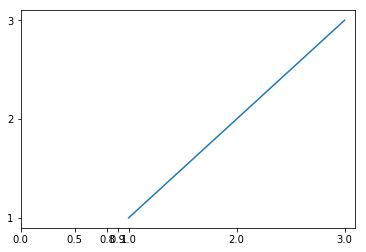

In [13]:
# uneven tick settings
x_tick_locations = [0, 0.5, 0.8, 0.9, 1, 2, 3]
ax.set_xticks(x_tick_locations)
fig

['', '1', '2', '3', '']


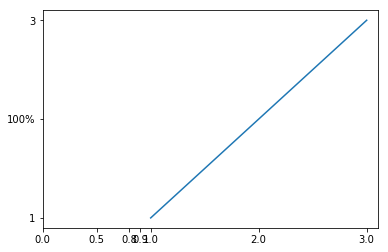

In [14]:
# for some reason I want to change the y tick label of 3 to 100%
# now we will get use to using getters and setters in matplotlib

# get the y tick labels so we can modify them
y_tick_labels = ax.get_yticklabels() # note that we are receiving label objects, we want the actual strings
y_tick_labels_text = [label.get_text() for label in y_tick_labels] # note another getter, called get_text()
print(y_tick_labels_text)

# we want to change '3' to '100%'
y_tick_labels_text[2] = '100%'

# let's set the y tick labels back to this new list of strings
ax.set_yticklabels(y_tick_labels_text)
fig

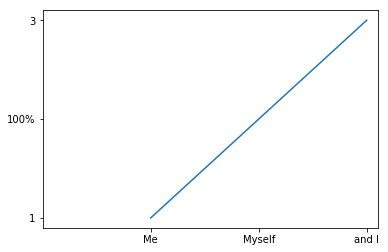

In [15]:
# if this was a bar chart, it will be more informative to use texts to label the x axis rather than numbers
# let's making something up
x_labels = ['Me', 'Myself', 'and I']

# these x labels need to correspond to an x tick location. 
# For this graph, the x ticks are located at the locations we plotted them, i.e. the variable dummyX
x_tick_locations = dummyX

# to make this entire change, we need to match the tick locations with the new tick labels
ax.set_xticks(dummyX)
ax.set_xticklabels(x_labels)
fig

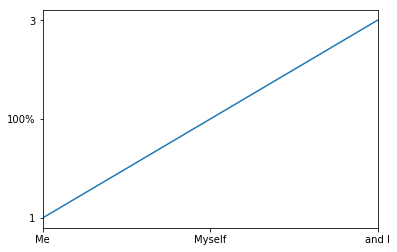

In [16]:
# figure is kind of weird, let's change the limits of the x axis
ax.set_xlim([1, 3])
fig

# notice that we used numerical values to control the x limits, even though we have text for the x axis
# the previous example above merely changed the representation of the x axis, but the actual content is 
# controlled by numerical values, in this case, the tick marks placed by the variable dummyX

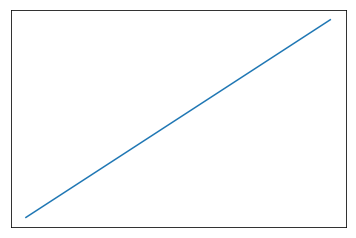

In [21]:
# hiding tick labels systematically
# let's plot it again
fig, ax = plt.subplots(1,1)
ax.plot(dummyX, dummyY)

# 
ax.tick_params(axis='both', # can also be just 'x' or 'y'
                left='off', 
                top='off', 
                right='off', 
                bottom='off', 
                labelleft='off', 
                labeltop='off', 
                labelright='off', 
                labelbottom='off')

# it's naked!

# Moving axis around - TICKS

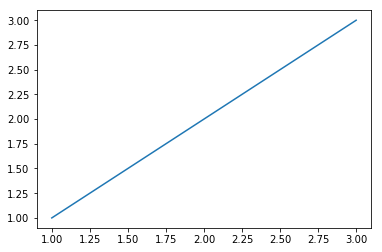

In [17]:
# make a figure and axes using an object oriented method
figsize=(4,4)
fig, ax = plt.subplots(1,1)

dummyX = [1,2,3]
dummyY = [1,2,3]
ax.plot(dummyX, dummyY)

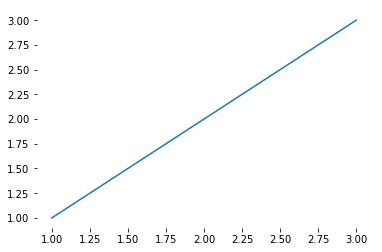

In [18]:
# each edge line is called a spline, let's hide them all
ax.set_frame_on(False)

# in this case, only the spines are gone
fig

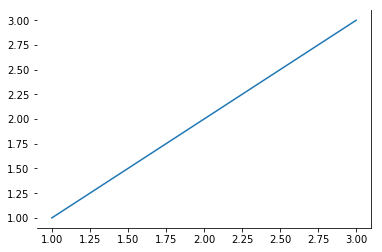

In [19]:
# reset splines
ax.set_frame_on(True)

# removing one spine at a time
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)

# the ticks and ticklabels are not effected by setting the visbility
fig

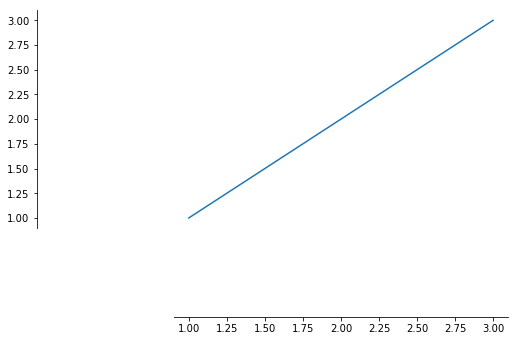

In [28]:
# remake the figure
figsize=(4,4)
fig, ax = plt.subplots(1,1)

dummyX = [1,2,3]
dummyY = [1,2,3]
ax.plot(dummyX, dummyY)

# move around the spines
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# hide spines we don't want
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# we see that the spines have moved to the zero position
# and have taken the ticks and tick labels with them
# you 

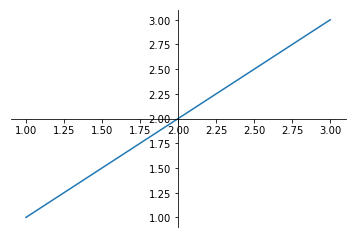

In [29]:
ax.spines['left'].set_position(('data', 2))
ax.spines['bottom'].set_position(("data", 2))

fig